<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
تحلیل ماندگاری مشتری
</font>
</h1>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
       معمولاً جذب مشتری جدید برای یک شرکت امر دشوار و هزینه‌بری است زیرا که برای این کار تیم بازاریابی نیاز به استفاده از روش‌های مختلف تبلیغات و ارتباط با مشتریان دارد.
       بنابراین سعی می‌شود تا حد ممکن به حفظ مشتریان فعلی و افزایش ماندگاری آن‌ها توجه شود.
       برای تسهیل چنین کاری در گام آخر از پروژه باید نموداری رسم کنید که نمایانگر ماندگاری مشتریان شرکت باشد و به کمک تیم بازاریابی بیاید.
</font>
</p>

   
<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
کتابخانه‌ها
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
       ابتدا کتابخانه‌های مورد نیاز خود را فرا بخوانید.
</font>
</p>

In [3]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
    مجموعه‌داده
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    حال داده‌های پیش‌پردازش‌شده را که در گام اول پروژه در فایل <code>preprocessed_sales.csv</code> ذخیره کردید به شکل یک دیتافریم بخوانید.
</font>
</p>

In [2]:
df = pd.read_csv("preprocessed_sales.csv")
df.head()

InvoiceNumber ProductCode                          ProductName  Quantity  \
0         489434       85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1         489434      79323P                   PINK CHERRY LIGHTS        12   
2         489434      79323W                  WHITE CHERRY LIGHTS        12   
3         489434       22041         RECORD FRAME 7" SINGLE SIZE         48   
4         489434       21232       STRAWBERRY CERAMIC TRINKET BOX        24   

           InvoiceDate  UnitPrice  CustomerId         Country  
0  2009-12-01 07:45:00       6.95     13085.0  United Kingdom  
1  2009-12-01 07:45:00       6.75     13085.0  United Kingdom  
2  2009-12-01 07:45:00       6.75     13085.0  United Kingdom  
3  2009-12-01 07:45:00       2.10     13085.0  United Kingdom  
4  2009-12-01 07:45:00       1.25     13085.0  United Kingdom

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
    نمودار ماندگاری
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    در این گام از پروژه باید نموداری همچون شکل زیر رسم کنید که محور عمودی آن، نشان‌‌دهنده‌ی ماهی است که یک مشتری برای اولین‌بار با شرکت معامله داشته و محور افقی، نشان‌ می‌دهد که چند درصد مشتریان جدید در ماه‌های بعد از اولین معامله، مشتری شرکت می‌مانند و با شرکت حداقل یک فاکتور در ماه دارند.
    <br>
    به‌عنوان مثال در ماه اول (<code dir=ltr>2009-12-01</code>) از شکل زیر مشاهده می‌کنید از بین افرادی که برای نخستین بار خریدشان را در ماه <code>12</code> از سال <code>2009</code> انجام داده‌اند، ۳۵ درصد در ماه بعد هم حداقل یک معامله داشته‌اند و ۳۳ درصد نیز دو ماه بعد حداقل یک فاکتور ثبت کرده‌اند.
</font>
</p>

<div style="text-align:center;"><img src="retention_rate_b.jpg"></div>

<h3 align=right dir=rtl style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>نقشه‌ی حرارتی (Heatmap)</b>
</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    نقشه‌ی حرارتی را پیش از این هم در تمرین‌های قبلی کالج دیده و ترسیم کرده‌اید. با این حال، در اینجا از یک سری پارامتر دیگر آن هم استفاده خواهیم کرد.
    <br>
پارامتر <code>annot</code> مخفف کلمه‌ی <i>annotation</i> به معنی حاشیه‌نویسی است. با <code>True</code> کردن این پارامتر، مقدار خانه‌ها روی آن‌ها نمایش داده می‌شود.
<br>
همچنین پارامترهای <code>vmin</code> و <code>vmax</code>، محدوده‌ی اعدادی که تابع نگاشت رنگ روی آن‌ها نگاشت انجام می‌دهد را تعیین می‌کند. در حالت پیش‌فرض، این بازه طبق داده‌های ورودی تنظیم می‌شود اما با تنظیم مقادیر مشخص برای آن‌ها، اعدادی که خارج از بازه‌ی مشخص‌شده قرار می‌گیرند،‌ رنگی معادل
 اعداد انتهای بازه خواهند داشت.
 <br>
 

</font>
</p>

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>فرمت رشته</b>
</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
موضوع دیگری که در این سوال با آن مواجه می‌شوید، فرمت رشته‌ی نمایشی بر روی خانه‌های نقشه حرارتی می‌باشد.
<br>
با پارامتر <code>fmt</code> در متد <code>heatmap</code> می‌توان فرمت نمایش اعداد را مشخص کرد. این کار با استفاده از کد فرمت رشته مشخص می‌شود. کد <code>f</code> مشخص می‌کند که اعداد تا چند رقم اعشار نمایش داده شوند. برای آشنایی با دیگر کدهای فرمت رشته، 
<a href="url">این لینک</a>
ببینید.
 

</font>
</p>


<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>ویژگی‌های نمودار</b>
</font>
</h3>

<center>
<div dir=rtl style="direction: rtl;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>

| <b style="color:#0099cc">ویژگی</b> | <b style="color:#0099cc">مقدار</b> |
| :---: | :---: |
| اندازه‌ی شکل | ۱۵ در ۸ اینچ |
| بازه اعداد برای تابع نگاشت رنگ | ۰ تا ۵۰ |
| کد فرمت مورد استفاده | <code dir=ltr>.0f</code> |
| تابع نگاشت رنگ (<code>cmap</code>) | <code>BuGn</code> |

</font>
</div>
</center>


In [7]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'] ,format='%Y-%m-%d %H:%M:%S').dt.date
df['y']= df['InvoiceDate'].apply(lambda x: x.replace(day=1))
df

InvoiceNumber ProductCode                          ProductName  \
0              489434       85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS   
1              489434      79323P                   PINK CHERRY LIGHTS   
2              489434      79323W                  WHITE CHERRY LIGHTS   
3              489434       22041         RECORD FRAME 7" SINGLE SIZE    
4              489434       21232       STRAWBERRY CERAMIC TRINKET BOX   
...               ...         ...                                  ...   
400911         538171       22271                 FELTCRAFT DOLL ROSIE   
400912         538171       22750         FELTCRAFT PRINCESS LOLA DOLL   
400913         538171       22751       FELTCRAFT PRINCESS OLIVIA DOLL   
400914         538171       20970   PINK FLORAL FELTCRAFT SHOULDER BAG   
400915         538171       21931               JUMBO STORAGE BAG SUKI   

        Quantity InvoiceDate  UnitPrice  CustomerId         Country  \
0             12  2009-12-01       6.95     13085.0  United Kingdom   
1             12  2009-12-01       6.75     13085.0  United Kingdom   
2             12  2009-12-01       6.75     13085.0  United Kingdom   
3             48  2009-12-01       2.10     13085.0  United Kingdom   
4             24  2009-12-01       1.25     13085.0  United Kingdom   
...          ...         ...        ...         ...             ...   
400911         2  2010-12-09       2.95     17530.0  United Kingdom   
400912         1  2010-12-09       3.75     17530.0  United Kingdom   
400913         1  2010-12-09       3.75     17530.0  United Kingdom   
400914         2  2010-12-09       3.75     17530.0  United Kingdom   
400915         2  2010-12-09       1.95     17530.0  United Kingdom   

                 y  
0       2009-12-01  
1       2009-12-01  
2       2009-12-01  
3       2009-12-01  
4       2009-12-01  
...            ...  
400911  2010-12-01  
400912  2010-12-01  
400913  2010-12-01  
400914  2010-12-01  
400915  2010-12-01  

[400916 rows x 9 columns]

In [8]:
enter=df.groupby('CustomerId')['y'].min()
enter=pd.DataFrame(enter)
enter

y
CustomerId            
12346.0     2009-12-01
12347.0     2010-10-01
12348.0     2010-09-01
12349.0     2010-04-01
12351.0     2010-11-01
...                ...
18283.0     2010-02-01
18284.0     2010-10-01
18285.0     2010-02-01
18286.0     2009-12-01
18287.0     2010-05-01

[4312 rows x 1 columns]

In [9]:
df1=pd.merge(df, enter, left_on = 'CustomerId', right_index = True)
df1=df1.rename(columns={'y_x':'InvoiceMonth'})
df1=df1.rename(columns={'y_y':'final_y'})
df1

InvoiceNumber ProductCode                          ProductName  \
0              489434       85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS   
1              489434      79323P                   PINK CHERRY LIGHTS   
2              489434      79323W                  WHITE CHERRY LIGHTS   
3              489434       22041         RECORD FRAME 7" SINGLE SIZE    
4              489434       21232       STRAWBERRY CERAMIC TRINKET BOX   
...               ...         ...                                  ...   
400911         538171       22271                 FELTCRAFT DOLL ROSIE   
400912         538171       22750         FELTCRAFT PRINCESS LOLA DOLL   
400913         538171       22751       FELTCRAFT PRINCESS OLIVIA DOLL   
400914         538171       20970   PINK FLORAL FELTCRAFT SHOULDER BAG   
400915         538171       21931               JUMBO STORAGE BAG SUKI   

        Quantity InvoiceDate  UnitPrice  CustomerId         Country  \
0             12  2009-12-01       6.95     13085.0  United Kingdom   
1             12  2009-12-01       6.75     13085.0  United Kingdom   
2             12  2009-12-01       6.75     13085.0  United Kingdom   
3             48  2009-12-01       2.10     13085.0  United Kingdom   
4             24  2009-12-01       1.25     13085.0  United Kingdom   
...          ...         ...        ...         ...             ...   
400911         2  2010-12-09       2.95     17530.0  United Kingdom   
400912         1  2010-12-09       3.75     17530.0  United Kingdom   
400913         1  2010-12-09       3.75     17530.0  United Kingdom   
400914         2  2010-12-09       3.75     17530.0  United Kingdom   
400915         2  2010-12-09       1.95     17530.0  United Kingdom   

       InvoiceMonth     final_y  
0        2009-12-01  2009-12-01  
1        2009-12-01  2009-12-01  
2        2009-12-01  2009-12-01  
3        2009-12-01  2009-12-01  
4        2009-12-01  2009-12-01  
...             ...         ...  
400911   2010-12-01  2009-12-01  
400912   2010-12-01  2009-12-01  
400913   2010-12-01  2009-12-01  
400914   2010-12-01  2009-12-01  
400915   2010-12-01  2009-12-01  

[400916 rows x 10 columns]

In [10]:
df1['final_y'] = pd.to_datetime(df1['final_y'], errors='coerce')
df1['InvoiceMonth'] = pd.to_datetime(df1['InvoiceMonth'], errors='coerce')

In [11]:
def get_date_int(df, column):
    year = df1[column].dt.year
    month = df1[column].dt.month
    return year, month

In [12]:
invoice_year, invoice_month = get_date_int(df1, 'InvoiceMonth')
cohort_year, cohort_month  = get_date_int(df1, 'final_y')

years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month

df1['final_x'] = years_diff * 12 + months_diff + 1

df1

InvoiceNumber ProductCode                          ProductName  \
0              489434       85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS   
1              489434      79323P                   PINK CHERRY LIGHTS   
2              489434      79323W                  WHITE CHERRY LIGHTS   
3              489434       22041         RECORD FRAME 7" SINGLE SIZE    
4              489434       21232       STRAWBERRY CERAMIC TRINKET BOX   
...               ...         ...                                  ...   
400911         538171       22271                 FELTCRAFT DOLL ROSIE   
400912         538171       22750         FELTCRAFT PRINCESS LOLA DOLL   
400913         538171       22751       FELTCRAFT PRINCESS OLIVIA DOLL   
400914         538171       20970   PINK FLORAL FELTCRAFT SHOULDER BAG   
400915         538171       21931               JUMBO STORAGE BAG SUKI   

        Quantity InvoiceDate  UnitPrice  CustomerId         Country  \
0             12  2009-12-01       6.95     13085.0  United Kingdom   
1             12  2009-12-01       6.75     13085.0  United Kingdom   
2             12  2009-12-01       6.75     13085.0  United Kingdom   
3             48  2009-12-01       2.10     13085.0  United Kingdom   
4             24  2009-12-01       1.25     13085.0  United Kingdom   
...          ...         ...        ...         ...             ...   
400911         2  2010-12-09       2.95     17530.0  United Kingdom   
400912         1  2010-12-09       3.75     17530.0  United Kingdom   
400913         1  2010-12-09       3.75     17530.0  United Kingdom   
400914         2  2010-12-09       3.75     17530.0  United Kingdom   
400915         2  2010-12-09       1.95     17530.0  United Kingdom   

       InvoiceMonth    final_y  final_x  
0        2009-12-01 2009-12-01        1  
1        2009-12-01 2009-12-01        1  
2        2009-12-01 2009-12-01        1  
3        2009-12-01 2009-12-01        1  
4        2009-12-01 2009-12-01        1  
...             ...        ...      ...  
400911   2010-12-01 2009-12-01       13  
400912   2010-12-01 2009-12-01       13  
400913   2010-12-01 2009-12-01       13  
400914   2010-12-01 2009-12-01       13  
400915   2010-12-01 2009-12-01       13  

[400916 rows x 11 columns]

In [13]:
df1['final_y'] =df1['final_y'].astype(str)
grouping = df1.groupby(['final_y', 'final_x'])
cohort_data = grouping['CustomerId'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()

cohort_counts = cohort_data.pivot(index='final_y', columns='final_x', values='CustomerId')
cohort_counts

final_x        1      2      3      4      5      6      7      8      9   \
final_y                                                                     
2009-12-01  955.0  337.0  319.0  406.0  363.0  343.0  360.0  327.0  321.0   
2010-01-01  383.0   79.0  119.0  117.0  101.0  115.0   99.0   88.0  107.0   
2010-02-01  374.0   89.0   84.0  109.0   92.0   75.0   72.0  107.0   95.0   
2010-03-01  443.0   84.0  102.0  107.0  103.0   90.0  109.0  134.0  122.0   
2010-04-01  294.0   57.0   57.0   48.0   54.0   66.0   81.0   77.0   20.0   
2010-05-01  254.0   40.0   43.0   44.0   45.0   65.0   54.0   20.0    NaN   
2010-06-01  270.0   47.0   51.0   55.0   62.0   77.0   18.0    NaN    NaN   
2010-07-01  186.0   29.0   34.0   55.0   54.0   19.0    NaN    NaN    NaN   
2010-08-01  162.0   33.0   48.0   52.0   19.0    NaN    NaN    NaN    NaN   
2010-09-01  243.0   55.0   57.0   24.0    NaN    NaN    NaN    NaN    NaN   
2010-10-01  377.0   97.0   35.0    NaN    NaN    NaN    NaN    NaN    NaN   
2010-11-01  325.0   35.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2010-12-01   46.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

final_x        10     11     12     13  
final_y                                 
2009-12-01  346.0  403.0  473.0  237.0  
2010-01-01  122.0  116.0   38.0    NaN  
2010-02-01  103.0   27.0    NaN    NaN  
2010-03-01   35.0    NaN    NaN    NaN  
2010-04-01    NaN    NaN    NaN    NaN  
2010-05-01    NaN    NaN    NaN    NaN  
2010-06-01    NaN    NaN    NaN    NaN  
2010-07-01    NaN    NaN    NaN    NaN  
2010-08-01    NaN    NaN    NaN    NaN  
2010-09-01    NaN    NaN    NaN    NaN  
2010-10-01    NaN    NaN    NaN    NaN  
2010-11-01    NaN    NaN    NaN    NaN  
2010-12-01    NaN    NaN    NaN    NaN

In [16]:
cohort_counts[2]=cohort_counts[2]/cohort_counts[1]*100
cohort_counts[3]=cohort_counts[3]/cohort_counts[1]*100
cohort_counts[4]=cohort_counts[4]/cohort_counts[1]*100
cohort_counts[5]=cohort_counts[5]/cohort_counts[1]*100
cohort_counts[6]=cohort_counts[6]/cohort_counts[1]*100
cohort_counts[7]=cohort_counts[7]/cohort_counts[1]*100
cohort_counts[8]=cohort_counts[8]/cohort_counts[1]*100
cohort_counts[9]=cohort_counts[9]/cohort_counts[1]*100
cohort_counts[10]=cohort_counts[10]/cohort_counts[1]*100
cohort_counts[11]=cohort_counts[11]/cohort_counts[1]*100
cohort_counts[12]=cohort_counts[12]/cohort_counts[1]*100
cohort_counts[13]=cohort_counts[13]/cohort_counts[1]*100
cohort_counts[1]=cohort_counts[1]/cohort_counts[1]*100
cohort_counts

final_x        1          2          3          4          5          6   \
final_y                                                                    
2009-12-01  100.0  35.287958  33.403141  42.513089  38.010471  35.916230   
2010-01-01  100.0  20.626632  31.070496  30.548303  26.370757  30.026110   
2010-02-01  100.0  23.796791  22.459893  29.144385  24.598930  20.053476   
2010-03-01  100.0  18.961625  23.024831  24.153499  23.250564  20.316027   
2010-04-01  100.0  19.387755  19.387755  16.326531  18.367347  22.448980   
2010-05-01  100.0  15.748031  16.929134  17.322835  17.716535  25.590551   
2010-06-01  100.0  17.407407  18.888889  20.370370  22.962963  28.518519   
2010-07-01  100.0  15.591398  18.279570  29.569892  29.032258  10.215054   
2010-08-01  100.0  20.370370  29.629630  32.098765  11.728395        NaN   
2010-09-01  100.0  22.633745  23.456790   9.876543        NaN        NaN   
2010-10-01  100.0  25.729443   9.283820        NaN        NaN        NaN   
2010-11-01  100.0  10.769231        NaN        NaN        NaN        NaN   
2010-12-01  100.0        NaN        NaN        NaN        NaN        NaN   

final_x            7          8          9          10         11         12  \
final_y                                                                        
2009-12-01  37.696335  34.240838  33.612565  36.230366  42.198953  49.528796   
2010-01-01  25.848564  22.976501  27.937337  31.853786  30.287206   9.921671   
2010-02-01  19.251337  28.609626  25.401070  27.540107   7.219251        NaN   
2010-03-01  24.604966  30.248307  27.539503   7.900677        NaN        NaN   
2010-04-01  27.551020  26.190476   6.802721        NaN        NaN        NaN   
2010-05-01  21.259843   7.874016        NaN        NaN        NaN        NaN   
2010-06-01   6.666667        NaN        NaN        NaN        NaN        NaN   
2010-07-01        NaN        NaN        NaN        NaN        NaN        NaN   
2010-08-01        NaN        NaN        NaN        NaN        NaN        NaN   
2010-09-01        NaN        NaN        NaN        NaN        NaN        NaN   
2010-10-01        NaN        NaN        NaN        NaN        NaN        NaN   
2010-11-01        NaN        NaN        NaN        NaN        NaN        NaN   
2010-12-01        NaN        NaN        NaN        NaN        NaN        NaN   

final_x            13  
final_y                
2009-12-01  24.816754  
2010-01-01        NaN  
2010-02-01        NaN  
2010-03-01        NaN  
2010-04-01        NaN  
2010-05-01        NaN  
2010-06-01        NaN  
2010-07-01        NaN  
2010-08-01        NaN  
2010-09-01        NaN  
2010-10-01        NaN  
2010-11-01        NaN  
2010-12-01        NaN

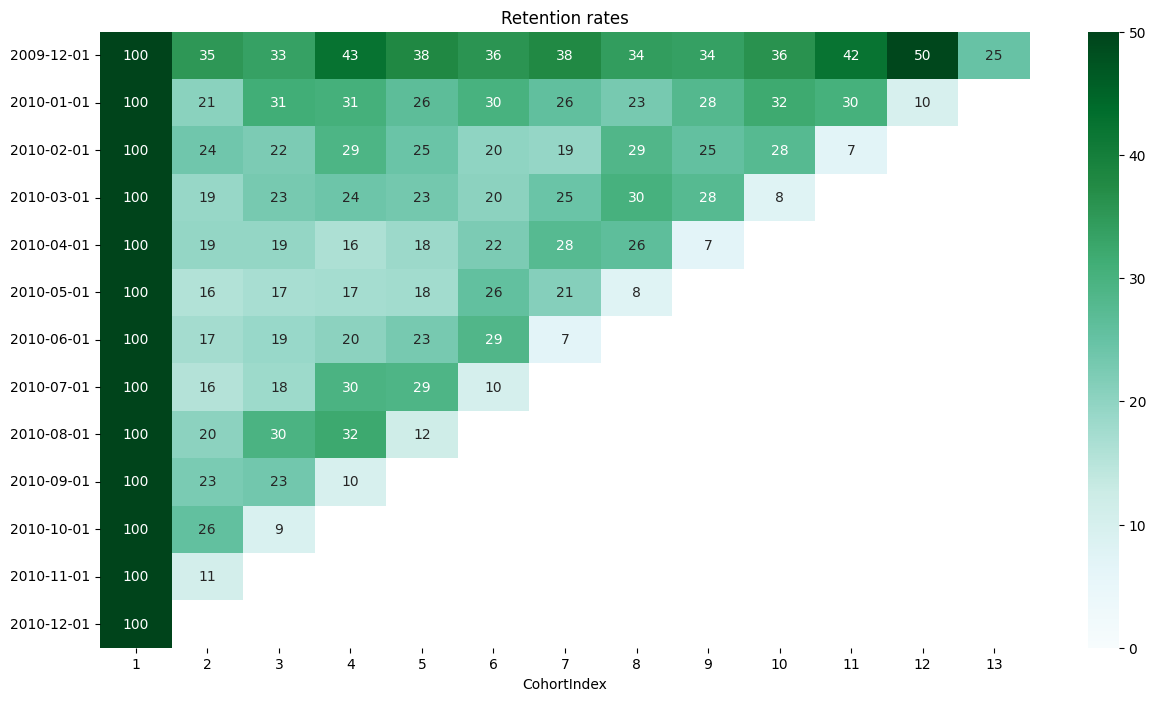

In [17]:
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap( data=cohort_counts , annot = True,vmin=0,vmax=50,fmt='.0f',cmap='BuGn',ax=ax)
ax.set_title("Retention rates")
ax.set_xlabel("CohortIndex")
ax.set_ylabel("")

plt.show()

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>سلول جواب‌ساز</b>
</font>
</h2>


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    برای ساخته‌شدن فایل <code>result.zip</code> سلول زیر را اجرا کنید. توجه داشته باشید که پیش از اجرای سلول زیر تغییرات اعمال شده در نت‌بوک را ذخیره کرده باشید (<code>ctrl+s</code>) تا در صورت نیاز به پشتیبانی امکان بررسی کد شما وجود داشته باشد.
</font>
</p>

In [18]:
import zipfile
import joblib

joblib.dump(fig,"fig")

def compress(file_names):
    print("File Paths:")
    print(file_names)
    compression = zipfile.ZIP_DEFLATED
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            zf.write('./' + file_name, file_name, compress_type=compression)

file_names = ["fig", "final_project_5_retention_rate.ipynb"]
compress(file_names)

File Paths:
['fig', 'final_project_5_retention_rate.ipynb']
